In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_excel('accident_stat.xlsx')

In [18]:
df.head()

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062


In [19]:
df.describe(include='all')

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,17,17,17,17.000000,17.000000,17.000000,17.000000,17.000000
unique,3,14,15,NaN,NaN,NaN,NaN,NaN
top,차량단독,기타,기타,NaN,NaN,NaN,NaN,NaN
freq,7,3,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,11948.764706,171.529412,3288.529412,12898.941176,965.882353
std,NaN,NaN,NaN,19737.442677,156.755430,4788.596978,24056.082421,1624.039558
min,NaN,NaN,NaN,23.000000,2.000000,7.000000,8.000000,6.000000
25%,NaN,NaN,NaN,956.000000,33.000000,304.000000,403.000000,121.000000
50%,NaN,NaN,NaN,3401.000000,146.000000,1114.000000,2007.000000,209.000000
75%,NaN,NaN,NaN,12767.000000,333.000000,4887.000000,8837.000000,588.000000


## 사고유형대분류가 '차대차'인 사고유형별 사망비율을 막대그래프로 시각화하기
- 사망비율은 사망자수/사고건수
- 폰트는 맑은 고딕으로 설정

In [20]:
mask = df['사고유형대분류'] == '차대차'
question_1 = df[mask]

In [21]:
question_1['사망비율'] = question_1['사망자수'] / question_1['사고건수']

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_9977/4172271430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_1['사망비율'] = question_1['사망자수'] / question_1['사고건수']


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46028 (\N{HANGUL SYLLABLE DOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malgun Gothic' not found.
/opt/homebrew/anaconda3/lib/

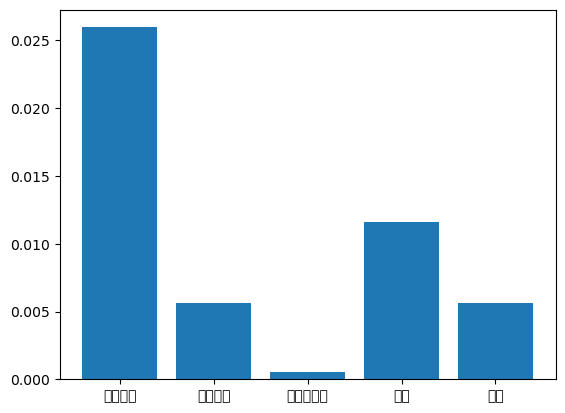

In [24]:
plt.bar(range(len(question_1)), question_1['사망비율'])
plt.xticks(range(len(question_1)), question_1['사고유형'])
plt.show()

## 사고유형대분류별로 사망자수가 가장 많은 사고 유형을 출력하기

In [42]:
df.loc[df.groupby('사고유형대분류')['사망자수'].idxmax(), '사고유형'].tolist()

['횡단중', '측면충돌', '공작물충돌']

## 사고유형별 중상비율을 계산하고 중상비율이 50%를 넘는 데이터만 csv로 저장

In [44]:
df['중상비율'] = df['중상자수']/df['사고건수']

In [46]:
question_3 = df.loc[df['중상비율']>0.5]

In [48]:
question_3.to_csv('중상비율.csv', index=False, encoding='utf-8')

In [49]:
q3 = pd.read_csv('중상비율.csv')
q3

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
0,차량단독,전복,전복,165,36,87,81,27,0.527273
1,차량단독,도로이탈,도로이탈 추락,385,73,199,179,44,0.516883
